In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# seaborn.set()
%matplotlib inline

In [2]:
try:
    os.chdir(os.path.join(os.path.dirname(os.getcwd()), r'mlclass-ex2-006\mlclass-ex2'))
    print(os.getcwd())
except:
    pass

P:\2019 Study\Python\coursera-mlclass-ex-python\mlclass-ex2-006\mlclass-ex2


# Logistic Function
probability $p$, odd $\frac{p}{1-p}$, log-odd (logit) function $ln\frac{p}{1-p}$

C:\Users\Peixin\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


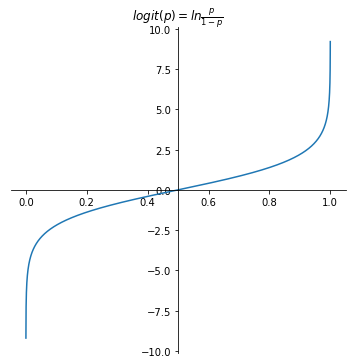

In [23]:
def logit(x):
    return np.log(x/(1-x))

p = np.linspace(0, 1, 1000, endpoint=False)
fig, ax = plt.subplots(figsize=(6,6))
# Move left y-axis and bottim x-axis to centre, passing (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title(r'$logit(p) = ln \frac{p}{1-p}$')
ax.plot(p, logit(p))

The inverse of logit function $t=ln\frac{p}{1-p}$ is sigmoid function $p=\sigma(t)=\frac{1}{1+e^{-t}}$

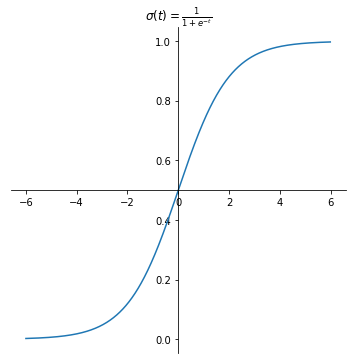

In [24]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-6, 6, 1000, endpoint=False)
fig, ax = plt.subplots(figsize=(6,6))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title(r'$\sigma(t)=\frac{1}{1+e^{-t}}$')
ax.plot(t, sigmoid(t))
None